In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results_con_if.csv')

In [15]:
# ejercicio 4 (calculo de mejora de batching contra greedy)

df['cost_gap%'] = (df['greedy_cost'] - df['batching_cost']) / df['greedy_cost']

# gap entre tiempo de greedy y tiempo batching
df['time_gap%'] = (df['greedy_time'] - df['batching_time']) / df['greedy_time']

# gap en rendimiento $/km
df['yield_gap%'] = (df['greedy_benefit'] - df['batching_benefit']) / df['greedy_benefit']

In [16]:
# medias globales
mean_ov_gap = df['cost_gap%'].mean()
print(mean_ov_gap)
mean_time_gap = df['time_gap%'].mean()
print(mean_time_gap)
mean_rend_km_gap = df['yield_gap%'].mean()
print(mean_rend_km_gap)

0.1588212700151724
-53.859476121390706
0.002309850899435992


In [17]:
# Tamaños de muestras por los cuales agrupar
sample_sizes = [10, 100, 250, 500]

# Agrupamos la data por tamaño de muestra y calculamos la media para columna
grouped_df = df.groupby('n').mean().reset_index()

# Tabla comparitiva cambios porcentuales entre Greedy y Batching
columns = ['n','cost_gap%','time_gap%','yield_gap%']
comparative_table = (grouped_df[columns] * 100).round(2)
print(comparative_table)

       n  cost_gap%  time_gap%  yield_gap%
0   1000      14.74   -3877.61      -12.78
1  10000      16.90   -4989.18       -4.00
2  25000      17.32   -5731.57        1.04
3  50000      14.57   -6945.43       16.67


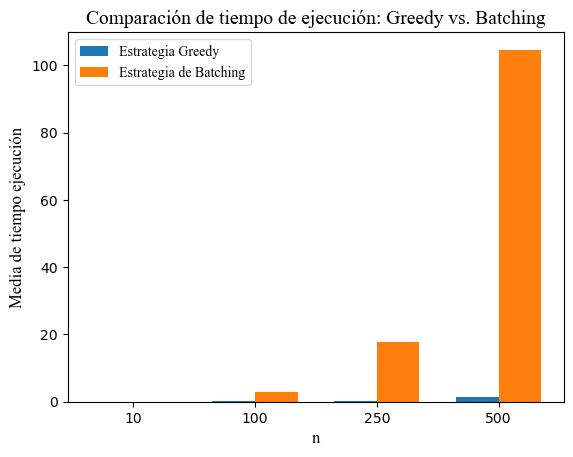

In [18]:
# Extraemos las medias de tiempo de ejecución
greedy_time = grouped_df['greedy_time']
batching_time = grouped_df['batching_time']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_time, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_time, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
label_font = {'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight': 'medium'}
plt.xlabel('n', **label_font)
plt.ylabel('Media de tiempo ejecución', **label_font)
title_font = {'fontname': 'Times New Roman', 'fontsize': 14, 'fontweight': 'medium'}
plt.title('Comparación de tiempo de ejecución: Greedy vs. Batching', **title_font)
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend(prop= 'Times New Roman')
plt.show()

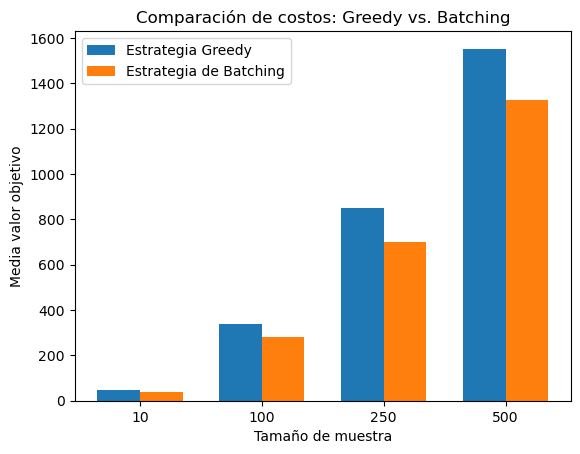

In [19]:
# Extraemos las medias de valor objetivo
greedy_ov = grouped_df['greedy_cost']
batching_ov = grouped_df['batching_cost']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_ov, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_ov, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de costos: Greedy vs. Batching')
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

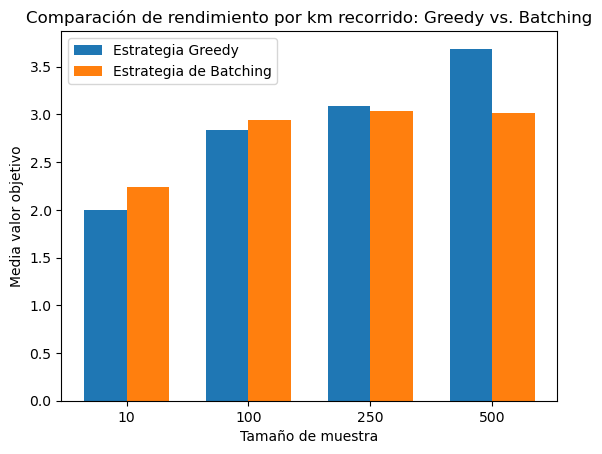

In [20]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
greedy_rend_km = grouped_df['greedy_benefit']
batching_rend_km = grouped_df['batching_benefit']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_rend_km, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching')
plt.xticks([r + bar_width/2 for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

In [21]:
columns_g = ['n','greedy_cost','greedy_time','greedy_benefit']
columns_b = ['n','batching_cost','batching_time','batching_benefit']
columns_a = ['n','alternative_cost','alternative_time','alternative_benefit']

table_greedy = (grouped_df[columns_g])
table_batching = (grouped_df[columns_b])
table_alternative = (grouped_df[columns_a])

# Convert DataFrame to Markdown table
table_g = table_greedy.to_markdown(index=False)
table_b = table_batching.to_markdown(index=False)
table_a = table_alternative.to_markdown(index=False)

# Save table to a .md file
with open('table_g.md', 'w') as file:
    file.write(table_g)

with open('table_b.md', 'w') as file:
    file.write(table_b)

with open('table_a.md', 'w') as file:
    file.write(table_a)

In [ ]:
# medias globales
print(df['cost_gap%'].mean())
mean_time_gap = df['time_gap%'].mean()
print(mean_time_gap)
mean_rend_km_gap = df['yield_gap%'].mean()
print(mean_rend_km_gap)

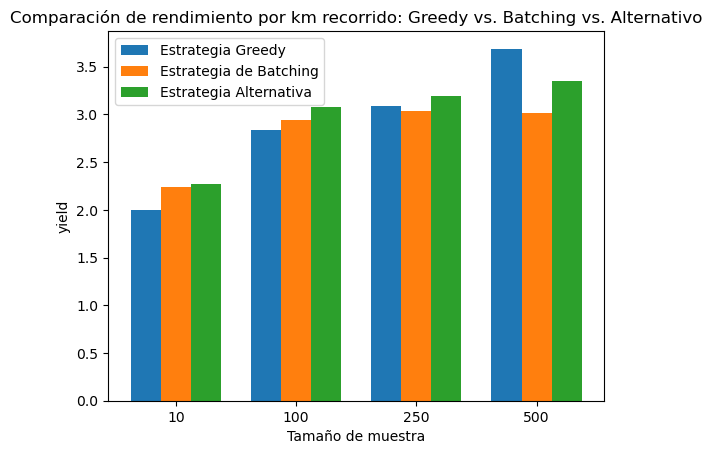

In [22]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
greedy_rend_km = grouped_df['greedy_benefit']
batching_rend_km = grouped_df['batching_benefit']
alternative_rend_km = grouped_df['alternative_benefit']

# Posicionamiento de las barras
bar_width = 0.25
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

# Creacion de barras para 
plt.bar(r1, greedy_rend_km, width=bar_width, label='Estrategia Greedy')
plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')
plt.bar(r3, alternative_rend_km, width=bar_width, label='Estrategia Alternativa')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('yield')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching vs. Alternativo')
plt.xticks([r + bar_width for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

In [23]:
# ejercicio 4 (calculo de mejora de batching contra greedy)

# gap en rendimiento $/km
df['yield_gap_2%'] = (df['batching_benefit'] - df['alternative_benefit']) / df['batching_benefit']

grouped_df_2 = df.groupby('n').mean().reset_index()

In [24]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
ov_gap = grouped_df['ov_gap%']
# batching_rend_km = grouped_df['batching_solution_cost']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, ov_gap, width=bar_width, label='Gap Valor Objetivo')
# plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching')
plt.xticks([r + bar_width for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

KeyError: 'ov_gap%'

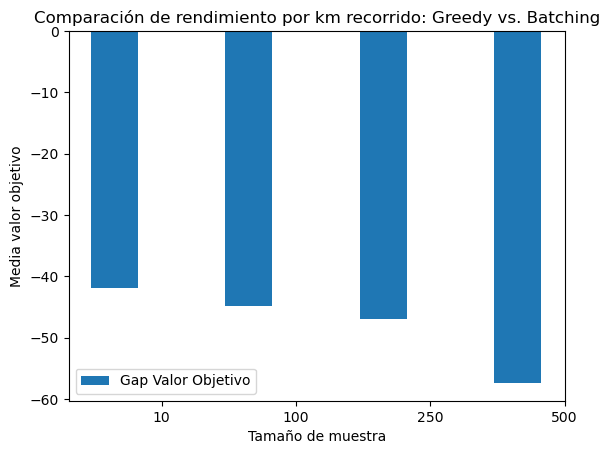

In [ ]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
time_gap = grouped_df['time_gap%']
# batching_rend_km = grouped_df['batching_solution_cost']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, time_gap, width=bar_width, label='Gap Valor Objetivo')
# plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching')
plt.xticks([r + bar_width for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

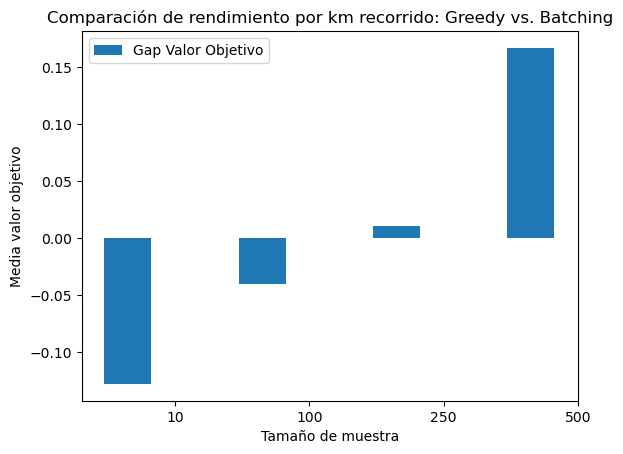

In [ ]:
# Extraemos las medias de ingreso ($) por km recorido (distancia de recogida + viaje)
rend_gap = grouped_df['money/km_gap%']
# batching_rend_km = grouped_df['batching_solution_cost']

# Posicionamiento de las barras
bar_width = 0.35
r1 = range(len(sample_sizes))
r2 = [x + bar_width for x in r1]

# Creacion de barras para 
plt.bar(r1, rend_gap, width=bar_width, label='Gap Valor Objetivo')
# plt.bar(r2, batching_rend_km, width=bar_width, label='Estrategia de Batching')

# Ticks, labels y título
plt.xlabel('Tamaño de muestra')
plt.ylabel('Media valor objetivo')
plt.title('Comparación de rendimiento por km recorrido: Greedy vs. Batching')
plt.xticks([r + bar_width for r in range(len(sample_sizes))], sample_sizes)

plt.legend()
plt.show()

In [ ]:
# división en dataframes

# n = 10
df_10 = df[df['n'] == 10]
print(df_10['ov_gap%'].mean())
print(df_10['time_gap%'].mean())

# n = 100
df_100 = df[df['n'] == 100]
print(df_100['ov_gap%'].mean())
print(df_100['time_gap%'].mean())

# n = 250
df_250 = df[df['n'] == 250]
print(df_250['ov_gap%'].mean())
print(df_250['time_gap%'].mean())

# n = 500
df_500 = df[df['n'] == 500]
print(df_500['ov_gap%'].mean())
print(df_500['time_gap%'].mean())

0.14737849238019915
-41.90334388422869
0.16902052186012728
-44.85113479246384
0.17322120358886833
-47.02289611620615
0.14566486223149486
-57.42006401843688


In [ ]:
df_test = pd.read_csv('nuevo_costo.csv')

df_test['rendimiento_km'] = df_test['tarifa'] / (df_test['recojida']+df_test['viaje'])

mean = df_test['rendimiento_km'].mean()

print(mean)

2.487036298581093
